<a href="https://colab.research.google.com/github/Fuad-Khan/Religious-Harassment-Models/blob/main/CNN_%2B_LSTM_%2B_GlobalAveragePooling_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Found embeddings for 11059 out of 42860 tokens.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 300)       │     3,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 96, 64)         │        96,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 48, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,733,378 (14.24 MB)

 Trainable params: 133,378 (521.01 KB)

 Non-trainable params: 3,600,000 (13.73 MB)

Epoch 1/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.6909 - loss: 0.5227

129/129 ━━━━━━━━━━━━━━━━━━━━ 35s 244ms/step - accuracy: 0.6919 - loss: 0.5217 - val_accuracy: 0.9297 - val_loss: 0.1946
Epoch 2/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.9280 - loss: 0.1951

129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 226ms/step - accuracy: 0.9281 - loss: 0.1950 - val_accuracy: 0.9449 - val_loss: 0.1562
Epoch 3/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9546 - loss: 0.1281

129/129 ━━━━━━━━━━━━━━━━━━━━ 42s 235ms/step - accuracy: 0.9546 - loss: 0.1281 - val_accuracy: 0.9411 - val_loss: 0.1340
Epoch 4/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 39s 226ms/step - accuracy: 0.9695 - loss: 0.0844 - val_accuracy: 0.9177 - val_loss: 0.2225
Epoch 5/6
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 235ms/step - accuracy: 0.9734 - loss: 0.0677 - val_accuracy: 0.9417 - val_loss: 0.1448
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step

✅ Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3236
           1       0.87      0.93      0.90      1348

    accuracy                           0.94      4584
   macro avg       0.92      0.94      0.93      4584
weighted avg       0.94      0.94      0.94      4584



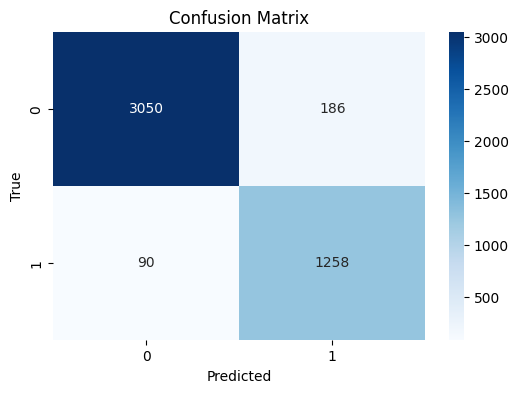

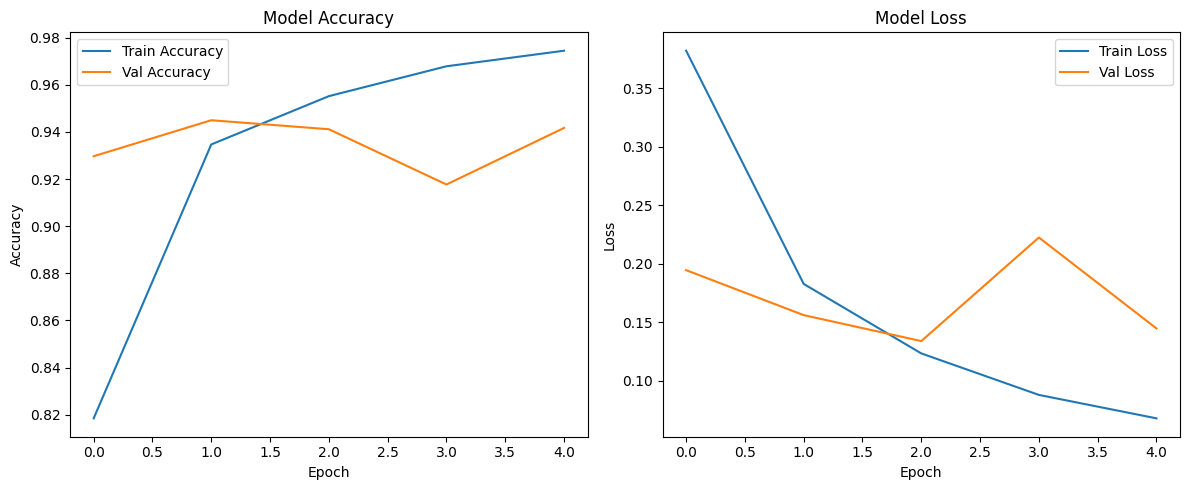


✅ Model and tokenizer saved.


In [1]:
# STEP 1: Imports
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, Conv1D, MaxPooling1D,
                                     LSTM, Dense, Dropout, GlobalAveragePooling1D)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# STEP 2: Load CSV file
file_path = '/content/Cleaned_Labeled_Religious_Comments.csv'  # Ensure file is uploaded in Colab
df = pd.read_csv(file_path)

# STEP 3: Prepare data
texts = df['comment'].astype(str).values
labels = df['label_binary'].astype(int).values
num_classes = len(np.unique(labels))

# STEP 4: Tokenization & Padding
vocab_size = 12000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# STEP 5: Load FastText Bangla Embeddings
!wget -q https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.bn.300.vec.gz

embedding_index = {}
with gzip.open('cc.bn.300.vec.gz', 'rt', encoding='utf-8', newline='\n', errors='ignore') as f:
    next(f)
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_dim = 300
word_index = tokenizer.word_index
embedding_matrix = np.zeros((vocab_size, embedding_dim))

found = 0
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            found += 1

print(f"✅ Found embeddings for {found} out of {len(word_index)} tokens.")

# STEP 6: Train/Test/Validation Split
X_train_full, X_test, y_train_full, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

# STEP 7: Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(class_weights))

# STEP 8: Build the Model
inputs = Input(shape=(max_length,))
x = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False)(inputs)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = LSTM(64, return_sequences=True)(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# STEP 9: Train the Model
callbacks = [
    EarlyStopping(patience=2, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model.fit(
    X_train, y_train,
    epochs=6,
    batch_size=128,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
)

# STEP 10: Evaluate
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# STEP 11: Plot Training History
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# STEP 12: Save Model and Tokenizer
model.save("bangla_multi_model.h5")
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("\n✅ Model and tokenizer saved.")


In [2]:
import tensorflow as tf
import pickle
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load model and tokenizer
model = tf.keras.models.load_model('bangla_multi_model.h5')
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Parameters (same as training)
vocab_size = 12000
max_length = 100

# Define class label meanings (edit if your dataset is different)
label_meanings = {
    0: "Normal",
    1: "Religious Harassment",

}

def predict_comment(comment):
    # Convert to sequence
    seq = tokenizer.texts_to_sequences([comment])
    padded_seq = pad_sequences(seq, maxlen=max_length, padding='post')

    # Predict probabilities
    pred_probs = model.predict(padded_seq)
    pred_class = int(np.argmax(pred_probs, axis=1)[0])
    confidence = float(np.max(pred_probs))

    return pred_class, label_meanings.get(pred_class, "Unknown"), confidence

# Example usage:
new_comment = "আপনার মন্তব্য এখানে দিন"
predicted_class, class_meaning, confidence = predict_comment(new_comment)

print(f"Predicted Class: {predicted_class} ({class_meaning})")
print(f"Confidence: {confidence:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Predicted Class: 0 (Normal)
Confidence: 0.9956
